In [586]:
import os           # Importing the os module to interact with the operating system
import pandas as pd   # Importing pandas for data manipulation and analysis
import numpy as np    # Importing numpy for numerical operations on arrays
import matplotlib.pyplot as plt    # Importing matplotlib for creating static, animated, and interactive visualizations in Python
# Enabling inline plotting in Jupyter notebooks, so plots are displayed below the code cells
%matplotlib inline
import seaborn as sns    # Importing seaborn for making statistical graphics and enhancing matplotlib graphics
sns.set()    # Setting the default seaborn style for all plots, which makes them more attractive and easier to read

# **IMPORT DATASET**

---



# About Dataset

---


This is a very simple multiple linear regression dataset for beginners. This dataset has only three columns and twenty rows. There are only two independent variables and one dependent variable. The independent variables are 'age' and 'experience'. The dependent variable is 'income'.

In [587]:
df = pd.read_csv("/content/multiple_linear_regression_dataset.csv")
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


# **DATA SET DESCRIPTION**

---

age is the age of the person
experience is the the total experience of th eperson
income is the annual income a person receives based on experience .This is the Target variable y that we are going to predict.y is the dependent variable.

All other columns are X known as independent variable using which we predict y(target) or dependent variable.

In [588]:
df.shape

(20, 3)

There are 20 rows and 3 columns.

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


All columns are integer data types

# check for null values

---



In [590]:
df.isnull().any()

age           False
experience    False
income        False
dtype: bool

In [591]:
df.isnull().sum()

age           0
experience    0
income        0
dtype: int64

There are no null values .So no preprocessing needed.

Text(0.5, 1.0, 'Heatmap of Missing values')

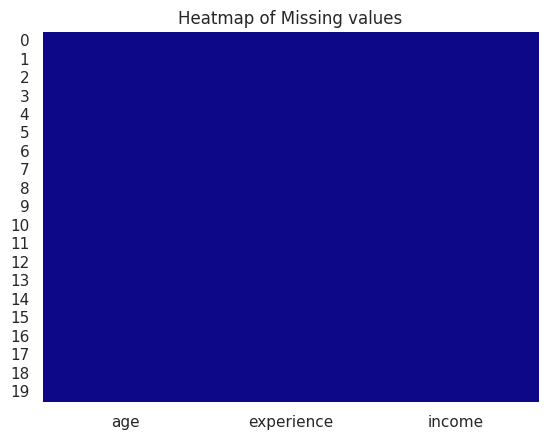

In [592]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'plasma')
plt.title('Heatmap of Missing values')

<Axes: >

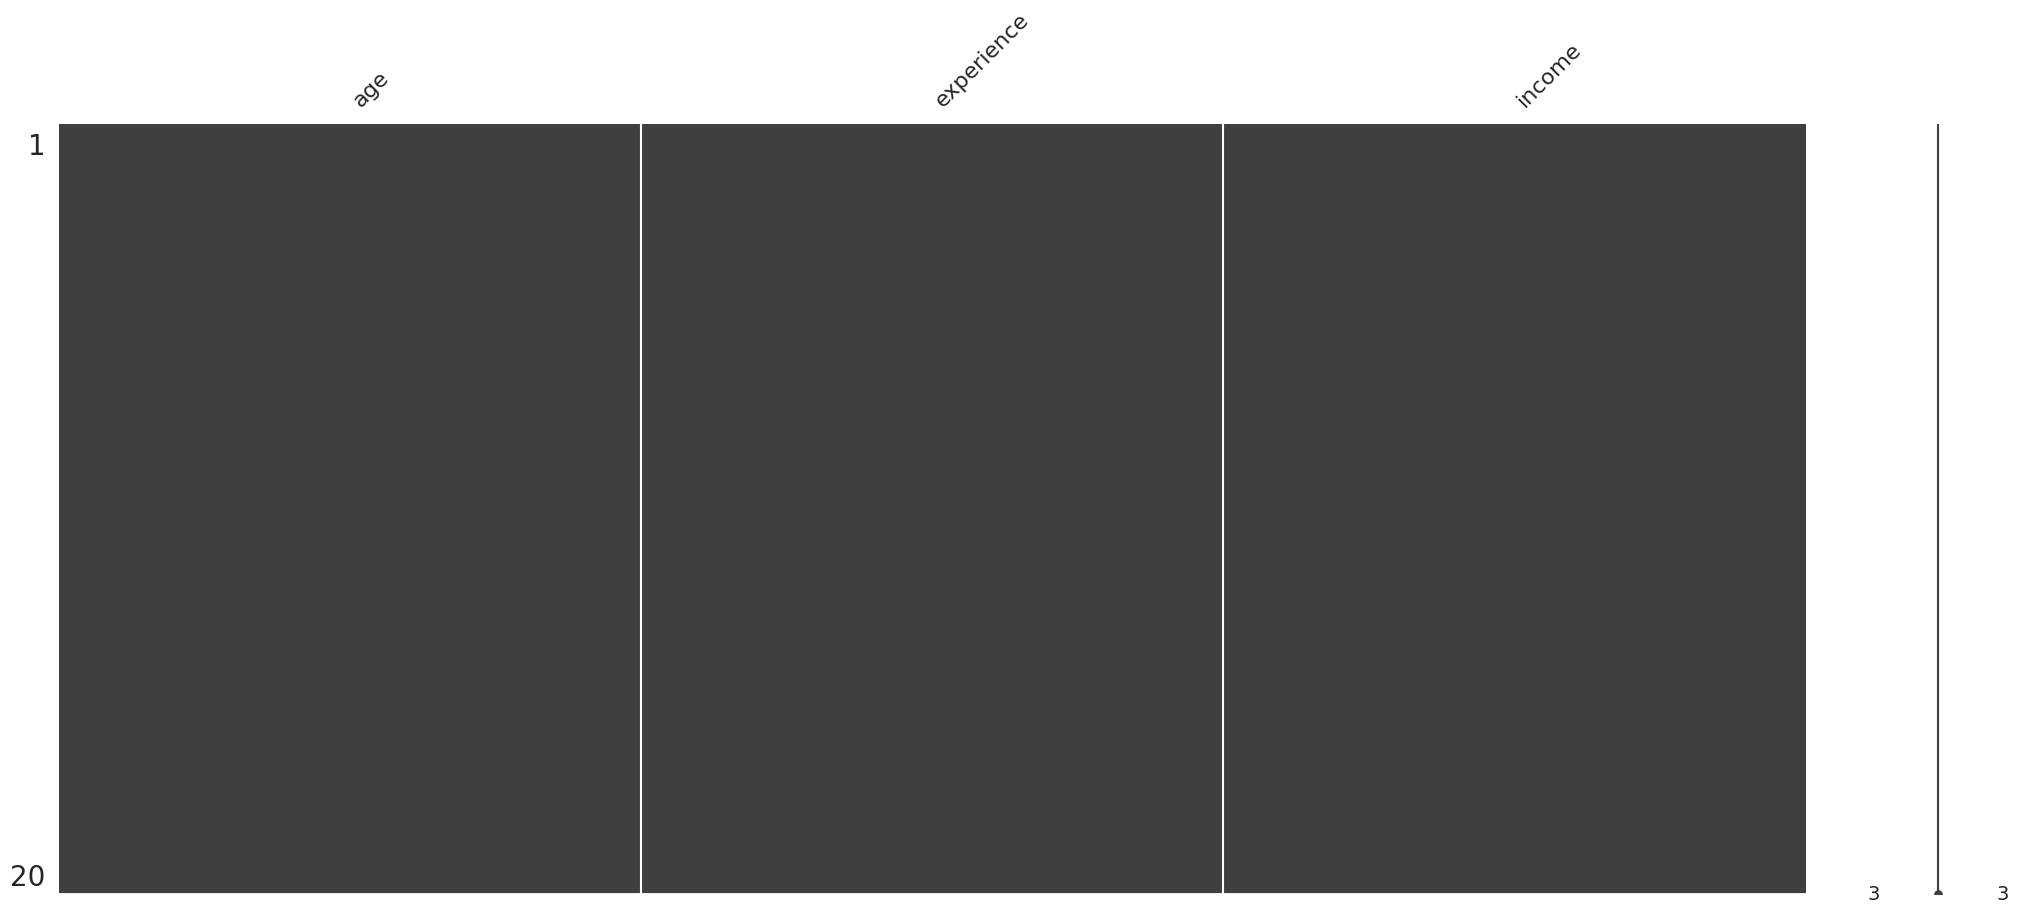

In [593]:
import missingno as msno
msno.matrix(df)

<Axes: >

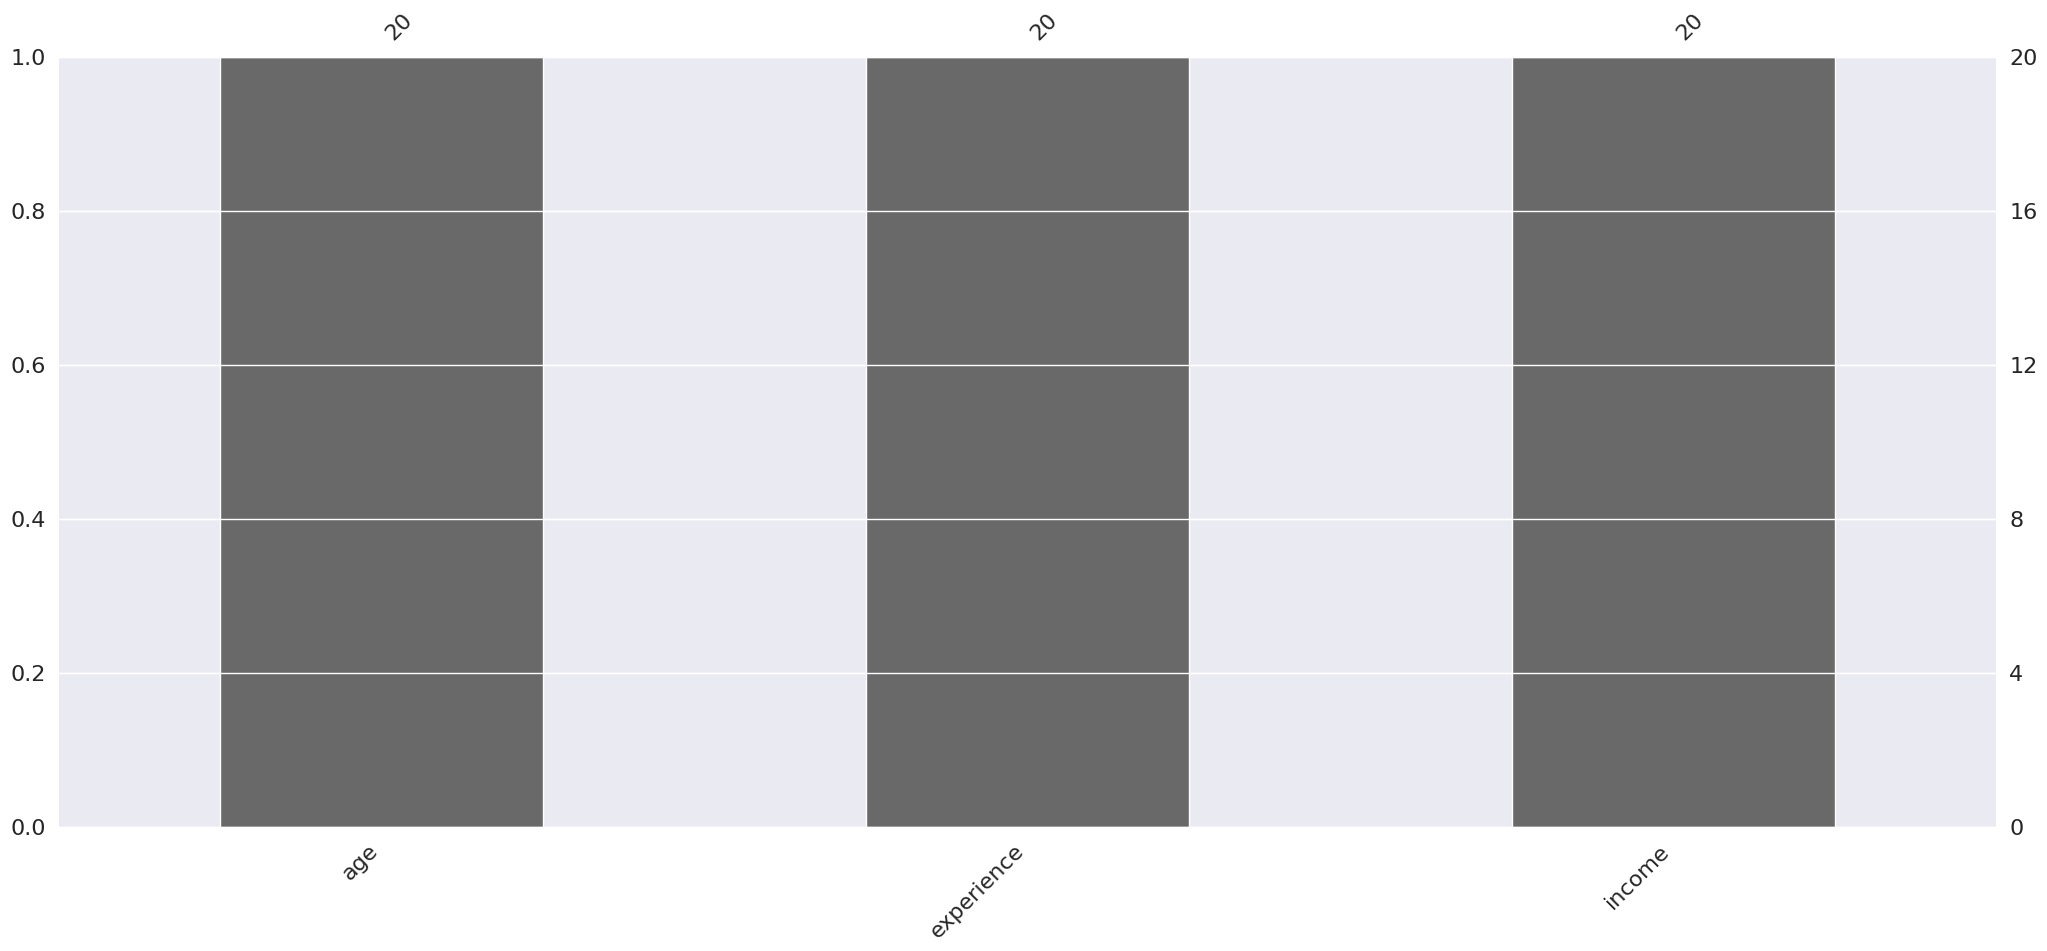

In [594]:
msno.bar(df)

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2847: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


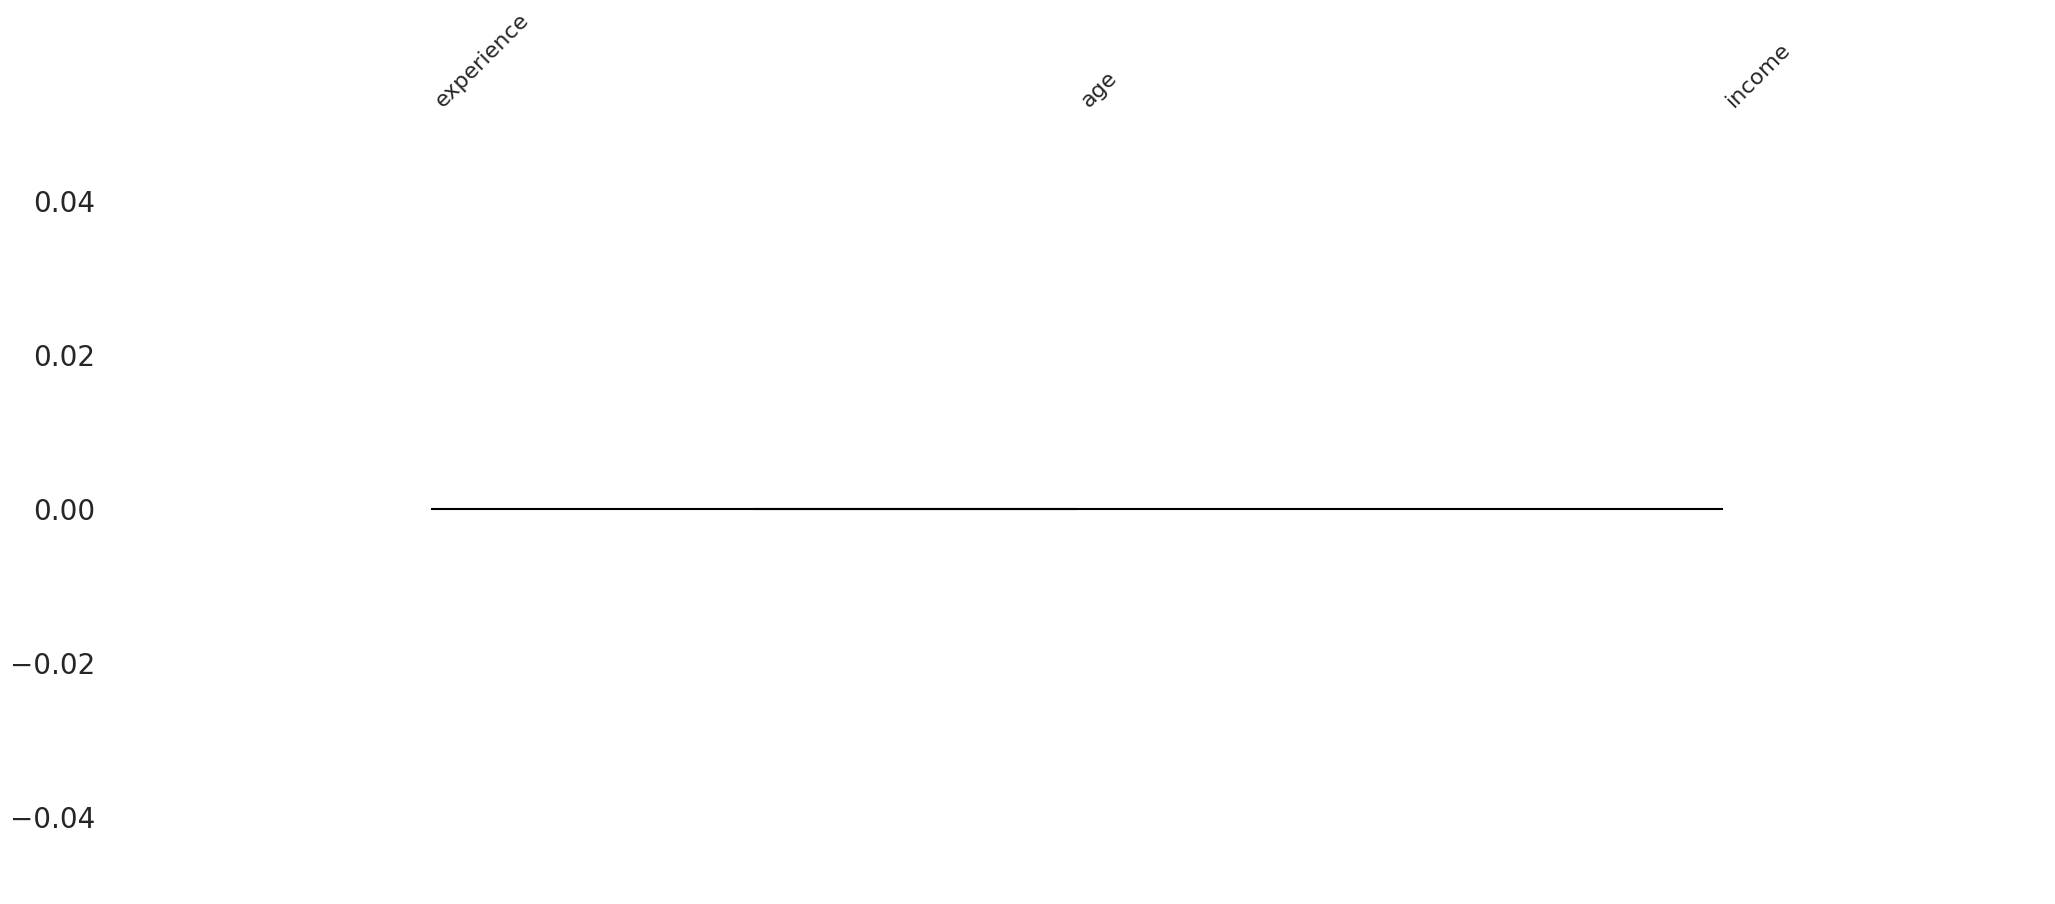

In [595]:
msno.dendrogram(df)
plt.show()

In [596]:
df.duplicated().sum()

0

There are no duplicates.

In [597]:
df.columns

Index(['age', 'experience', 'income'], dtype='object')

# **Descriptive statistics**

---



In [598]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,20.0,39.65,10.027725,23.0,31.50,40.0,47.0,58.0
experience,20.0,6.20,4.124382,1.0,3.75,5.0,9.0,17.0
income,20.0,40735.50,8439.797625,27840.0,35452.50,40190.0,45390.0,63600.0


In [599]:
# Summary statistics of numerical features
print("Summary Statistics:")
# Customize the appearance using a color palette
styled_summary = df.describe().T.style.background_gradient(cmap="Set1")

# Display the styled summary
styled_summary


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
age,20.000000,39.650000,10.027725,23.000000,31.500000,40.000000,47.000000,58.000000
experience,20.000000,6.200000,4.124382,1.000000,3.750000,5.000000,9.000000,17.000000
income,20.000000,40735.500000,8439.797625,27840.000000,35452.500000,40190.000000,45390.000000,63600.000000


# **DATA VISUALISATION**

---



<ipython-input-600-bf47a3d4a8a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=df, palette='viridis')


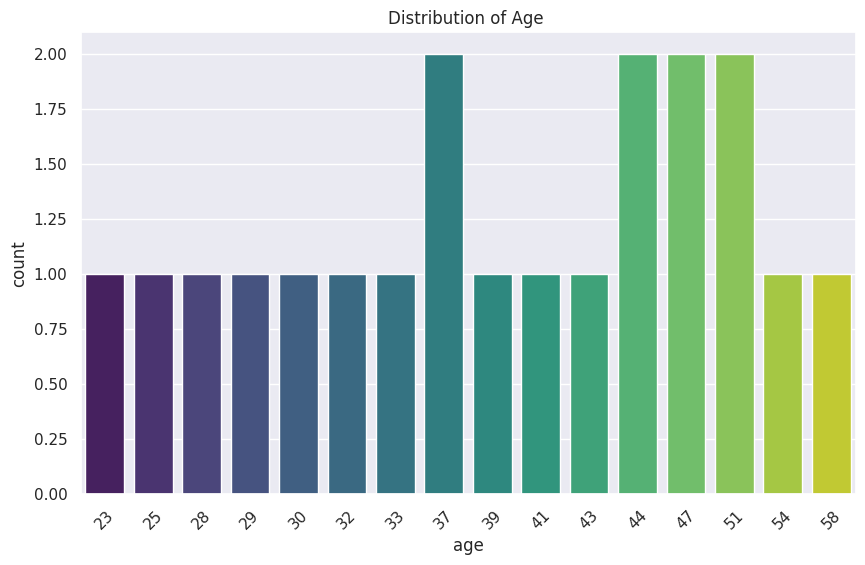

In [600]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df, palette='viridis')
plt.title('Distribution of Age ')
plt.xticks(rotation=45)
plt.show()

# **PIE CHART**

---



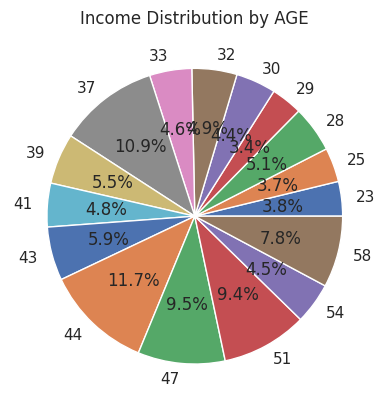

In [601]:
grouped_data = df.groupby('age')['income'].sum()
plt.pie(grouped_data, labels = grouped_data.index, autopct = '%1.1f%%')
plt.title('Income Distribution by AGE')
plt.show()

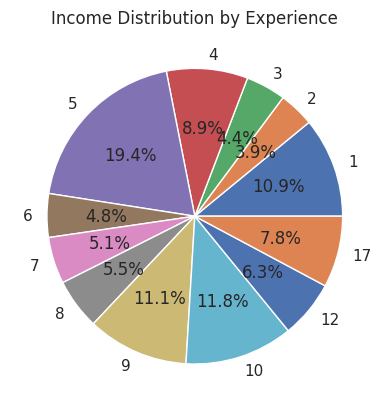

In [602]:
grouped_data = df.groupby('experience')['income'].sum()
plt.pie(grouped_data, labels = grouped_data.index, autopct = '%1.1f%%')
plt.title('Income Distribution by Experience')
plt.show()

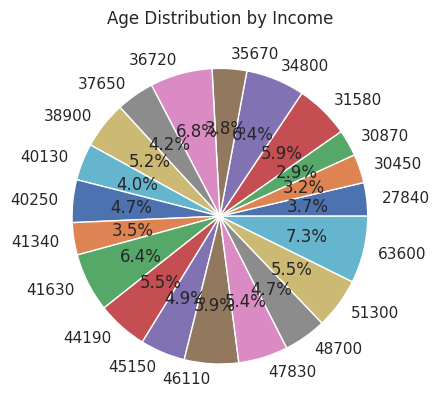

In [603]:
grouped_data = df.groupby('income')['age'].sum()
plt.pie(grouped_data, labels = grouped_data.index, autopct = '%1.1f%%')
plt.title('Age Distribution by Income')
plt.show()

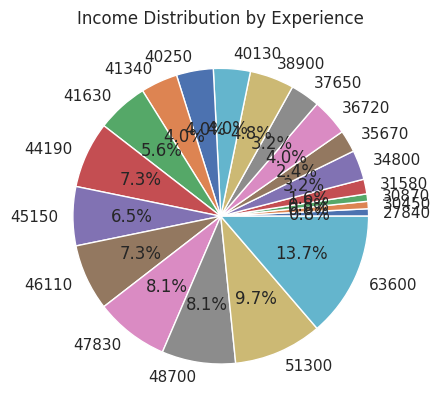

In [604]:
grouped_data = df.groupby('income')['experience'].sum()
plt.pie(grouped_data, labels = grouped_data.index, autopct = '%1.1f%%')
plt.title('Income Distribution by Experience')
plt.show()

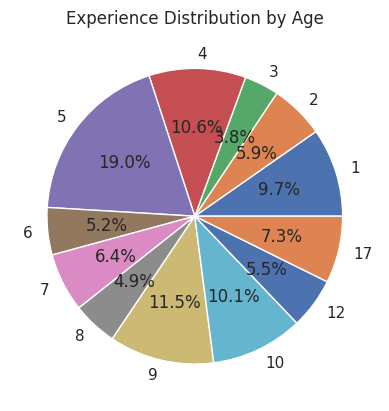

In [605]:
grouped_data = df.groupby('experience')['age'].sum()
plt.pie(grouped_data, labels = grouped_data.index, autopct = '%1.1f%%')
plt.title('Experience Distribution by Age')
plt.show()

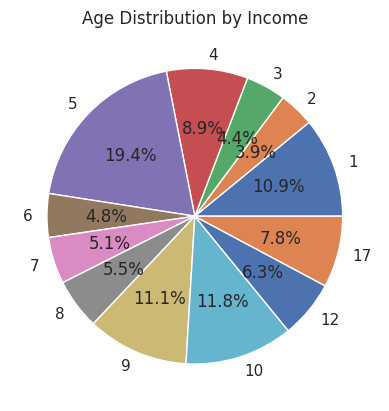

In [606]:
grouped_data = df.groupby('experience')['income'].sum()
plt.pie(grouped_data, labels = grouped_data.index, autopct = '%1.1f%%')
plt.title('Age Distribution by Income')
plt.show()

# **Line PLot**

---



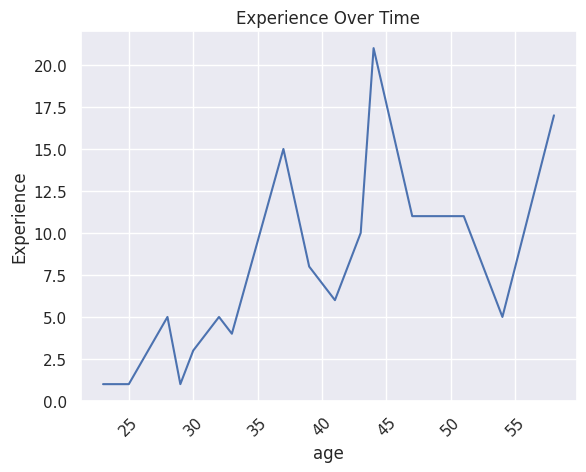

In [607]:
# Group by ORDERDATE and sum the SALES
grouped_data = df.groupby('age')['experience'].sum()

# Plot the line chart
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('age')
plt.ylabel('Experience')
plt.title('Experience Over Time')
plt.xticks(rotation=45)
plt.show()

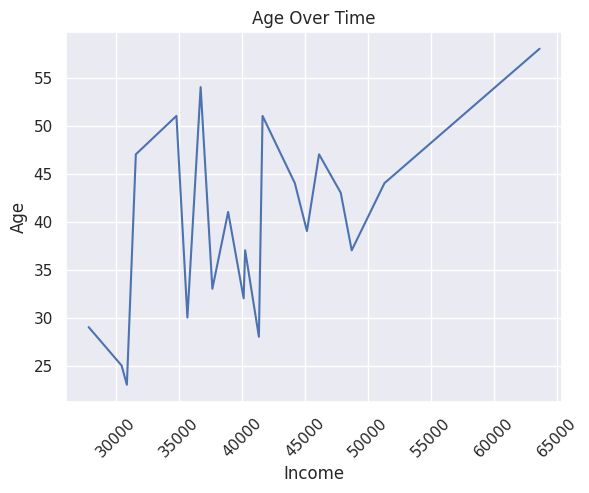

In [608]:
# Group by ORDERDATE and sum the SALES
grouped_data = df.groupby('income')['age'].sum()

# Plot the line chart
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Age Over Time')
plt.xticks(rotation=45)
plt.show()

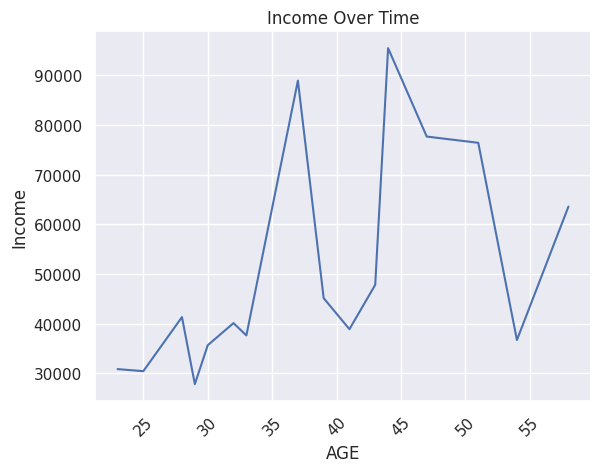

In [609]:
# Group by ORDERDATE and sum the SALES
grouped_data = df.groupby('age')['income'].sum()

# Plot the line chart
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('AGE')
plt.ylabel('Income')
plt.title('Income Over Time')
plt.xticks(rotation=45)
plt.show()

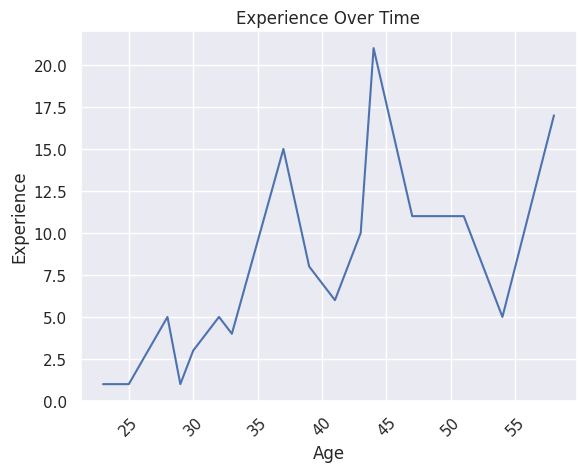

In [610]:
# Group by ORDERDATE and sum the SALES
grouped_data = df.groupby('age')['experience'].sum()

# Plot the line chart
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Age')
plt.ylabel('Experience')
plt.title('Experience Over Time')
plt.xticks(rotation=45)
plt.show()

# **Bar Plot**

---



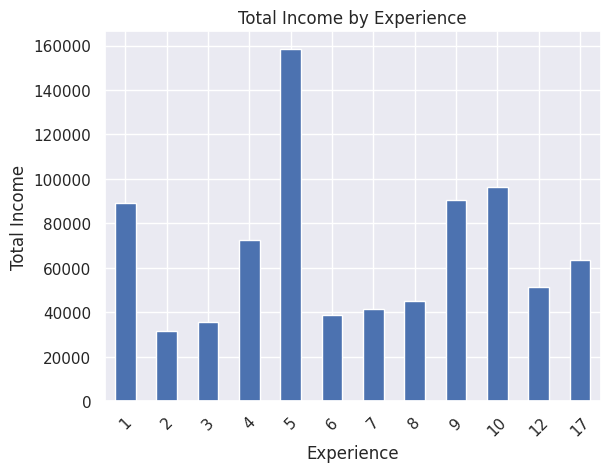

In [611]:
import matplotlib.pyplot as plt

# Group by PRODUCTLINE and sum the SALES
grouped_data = df.groupby('experience')['income'].sum()

# Plot the bar chart
grouped_data.plot(kind='bar')
plt.xlabel('Experience')
plt.ylabel('Total Income')
plt.title('Total Income by Experience')
plt.xticks(rotation=45)
plt.show()

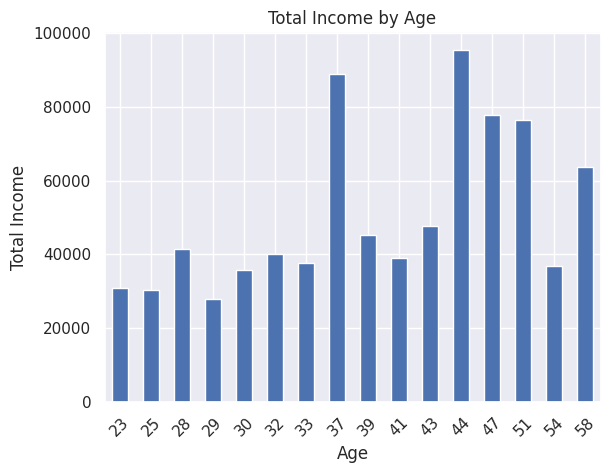

In [612]:
import matplotlib.pyplot as plt

# Group by PRODUCTLINE and sum the SALES
grouped_data = df.groupby('age')['income'].sum()

# Plot the bar chart
grouped_data.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Total Income')
plt.title('Total Income by Age')
plt.xticks(rotation=45)
plt.show()

# **Histograms**

---



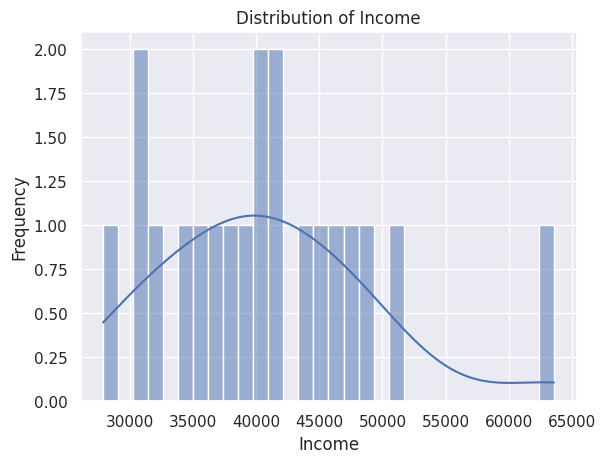

In [613]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram
sns.histplot(df['income'], bins=30, kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()


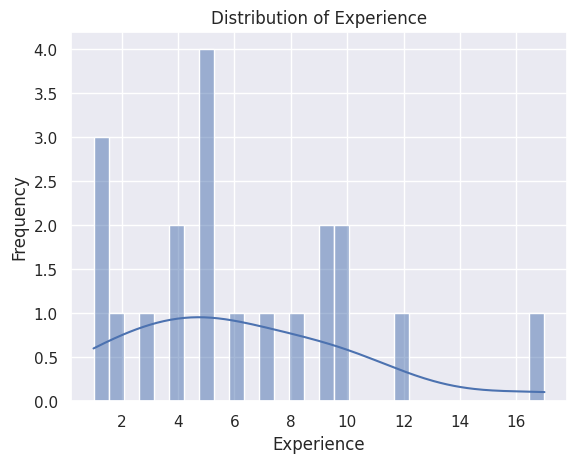

In [614]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram
sns.histplot(df['experience'], bins=30, kde=True)
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Experience')
plt.show()


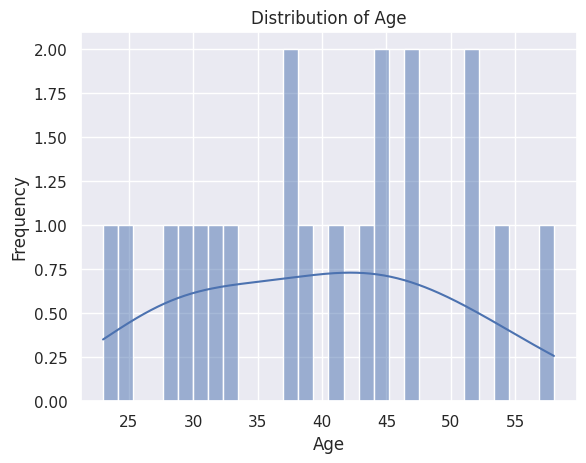

In [615]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram
sns.histplot(df['age'], bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


In [616]:

# Function to plot boxplot for a given column
def boxplot(col):
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

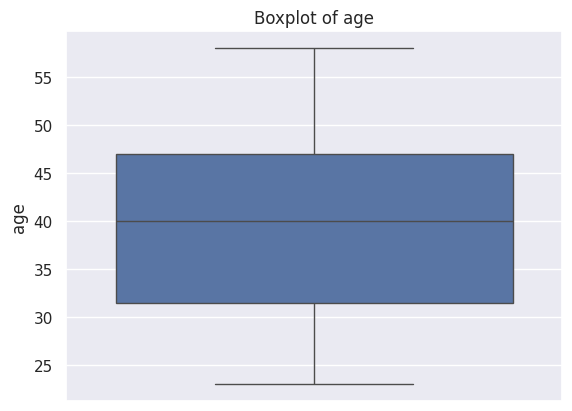

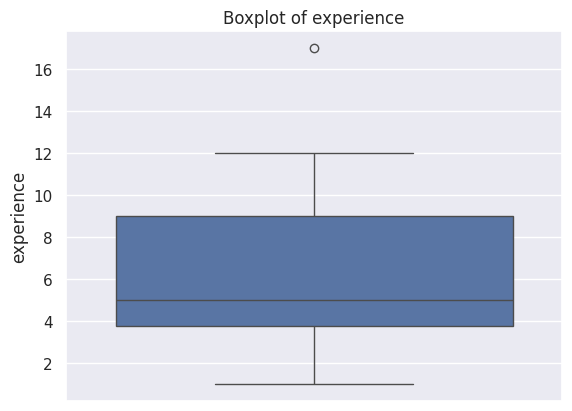

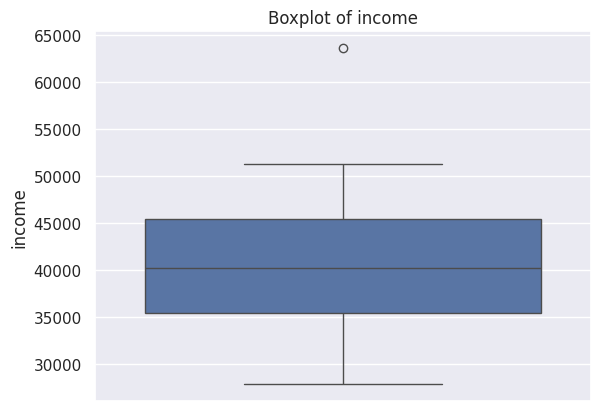

In [617]:
# Filter to select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Plot boxplots for each numeric column
for col in numeric_columns:
  boxplot(col)

# **Extracting features X and target variable (y)**

---



In [618]:
#X = df.drop(['income'],axis =1)#drop income column and taking age and experience or
x= df[['age', 'experience']].values
y = df['income'].values#take only income variable

In [619]:
x

array([[25,  1],
       [30,  3],
       [47,  2],
       [32,  5],
       [43, 10],
       [51,  7],
       [28,  5],
       [33,  4],
       [37,  5],
       [39,  8],
       [29,  1],
       [47,  9],
       [54,  5],
       [51,  4],
       [44, 12],
       [41,  6],
       [58, 17],
       [23,  1],
       [44,  9],
       [37, 10]])

In [620]:
y

array([30450, 35670, 31580, 40130, 47830, 41630, 41340, 37650, 40250,
       45150, 27840, 46110, 36720, 34800, 51300, 38900, 63600, 30870,
       44190, 48700])

In [621]:
#X.info()

In [622]:
x.shape

(20, 2)

In [623]:
#y.info()

In [624]:
y.shape

(20,)

In [625]:
x

array([[25,  1],
       [30,  3],
       [47,  2],
       [32,  5],
       [43, 10],
       [51,  7],
       [28,  5],
       [33,  4],
       [37,  5],
       [39,  8],
       [29,  1],
       [47,  9],
       [54,  5],
       [51,  4],
       [44, 12],
       [41,  6],
       [58, 17],
       [23,  1],
       [44,  9],
       [37, 10]])

In [626]:
y

array([30450, 35670, 31580, 40130, 47830, 41630, 41340, 37650, 40250,
       45150, 27840, 46110, 36720, 34800, 51300, 38900, 63600, 30870,
       44190, 48700])

# **Spliting data into testing and training set**

---



In [627]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =101)

In [628]:
# Adding a column of ones for the intercept term
"""
x_train = (np.vstack((np.ones_like((x_train.shape[0],1)),  x_train)).T)
x_test = (np.vstack((np.ones_like((x_test.shape[0],1)), x_test)).T)
"""

'\nx_train = (np.vstack((np.ones_like((x_train.shape[0],1)),  x_train)).T)\nx_test = (np.vstack((np.ones_like((x_test.shape[0],1)), x_test)).T)\n'

In [629]:

# Adding a column of ones for the intercept term to x_train
x_train = np.vstack((np.ones_like(x_train[:, 0]), x_train.T)).T

# Adding a column of ones for the intercept term to x_test
x_test = np.vstack((np.ones_like(x_test[:, 0]), x_test.T)).T


In [630]:
# Adding a column of ones for the intercept term to X_train and X_test
#x_train = np.vstack((np.ones((x_train.shape[0], 1)), x_train)).T
#x_test = np.vstack((np.ones((x_test.shape[0], 1)), x_test)).T


In [631]:

# Example dimensions check
print(f'x_train_with_intercept shape: {x_train.shape}')
print(f'x_test_with_intercept shape: {x_test.shape}')

x_train_with_intercept shape: (16, 3)
x_test_with_intercept shape: (4, 3)


In [632]:
"""
# Adding a column of ones for the intercept term to x_train
x_train= np.hstack((np.ones((x_train.shape[0], 1)), x_train))

# Adding a column of ones for the intercept term to x_test
x_test= np.hstack((np.ones((x_test.shape[0], 1)), x_test))
# Example dimensions check
print(f'x_train_with_intercept shape: {x_train.shape}')
print(f'x_test_with_intercept shape: {x_test.shape}')
"""

"\n# Adding a column of ones for the intercept term to x_train\nx_train= np.hstack((np.ones((x_train.shape[0], 1)), x_train))\n\n# Adding a column of ones for the intercept term to x_test\nx_test= np.hstack((np.ones((x_test.shape[0], 1)), x_test))\n# Example dimensions check\nprint(f'x_train_with_intercept shape: {x_train.shape}')\nprint(f'x_test_with_intercept shape: {x_test.shape}')\n"

In [633]:
# Function to perform Multiple linear regression
#WE ARE WRITING MULTIPLE LINEAR REGRESSION ALGORITHM

def multiple_linear_regression(X,y, learning_rate, epochs):
  m,n = X.shape
  weights = np.zeros(n)  # Initialize weights with zeros
  cost_list = []
#gradient descent
  for _ in range(epochs):
    predictions = np.dot(X,weights)
    error = predictions -y
    gradient = np.dot(X.T, error)/m
    weights -= learning_rate * gradient
    #calculate the cost
    cost = (1/(2*m)) * np.sum(error**2)
    cost_list.append(cost)
  return weights, cost_list


In [634]:
#Train the model
#Hyperparameters
learning_rate = 0.000001
epochs = 1000 # YOUR MODEL WILL GET PASS THROUGH THE DATASET 1000

# Perform linear regression
weights, cost_list = multiple_linear_regression(x_train, y_train, learning_rate, epochs)
#learning_rate is directly proportional to epochs

# Predict on the test set
y_pred_test = np.dot(x_test, weights)


# Calculate regression metrics
mse = np.mean((y_test - y_pred_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test))
total_variance = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (mse/total_variance)


In [635]:
# Print the final weights
print(f'Final weights: {weights}')

Final weights: [ 19.98517856 808.81695802 157.11136291]


In [636]:
# Print the final cost (optional, for verification)
final_cost = cost_list[-1]
print(f'Final cost: {final_cost}')

Final cost: 58533991.13137211


In [637]:
# Print regression metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 112984419.62227932
Root Mean Squared Error (RMSE): 10629.41294814908
Mean Absolute Error (MAE): 10358.92550721225
R-squared: -1.885238364974998


#ANALYSIS OF ACTUAL VS PREDICTED VALUES

---



In [638]:
# Create a DataFrame to display actual values, predicted values, and differences
results_df = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred_test, 'Difference (Actual - Predicted)': y_test-y_pred_test})

# Print the DataFrame
print(results_df)

   Actual values  Predicted values  Difference (Actual - Predicted)
0          40130      26687.684650                     13442.315350
1          37650      27339.390245                     10310.609755
2          31580      38348.604931                     -6768.604931
3          35670      24755.828008                     10914.171992


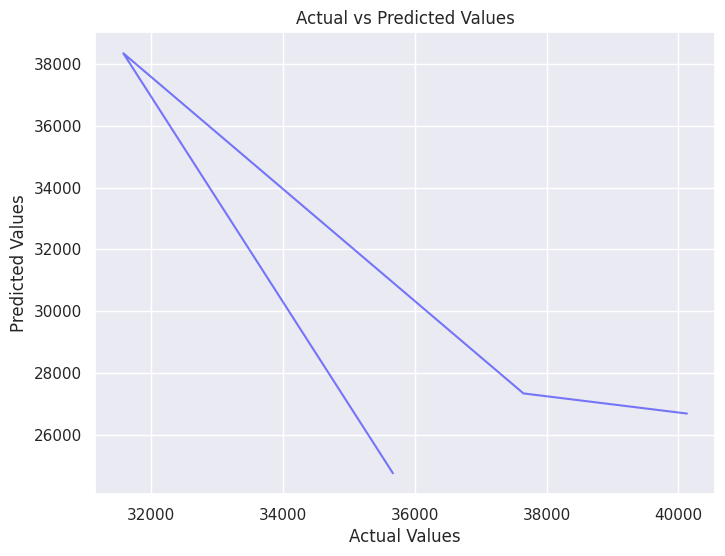

In [639]:
import matplotlib.pyplot as plt

# Example data creation (replace with your actual data loading process)
# Assuming y_test and y_pred_test are defined

# Create a scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.plot(y_test, y_pred_test, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


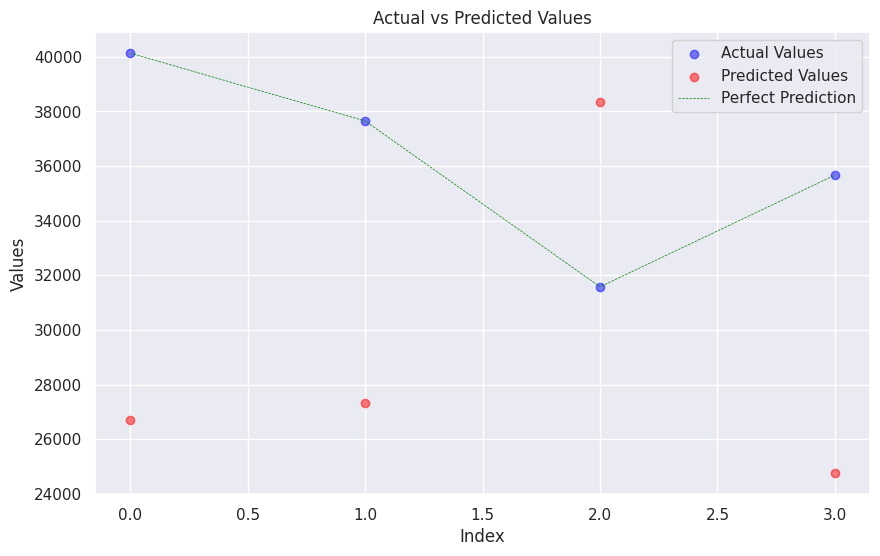

In [640]:
import matplotlib.pyplot as plt

# Create a DataFrame to display actual values, predicted values, and differences
results_df = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred_test, 'Difference (Actual - Predicted)': y_test - y_pred_test})

# Plot the actual values and predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual Values')
plt.scatter(range(len(y_test)), y_pred_test, color='red', alpha=0.5, label='Predicted Values')

# Add a line for perfect predictions (where Actual = Predicted)
plt.plot(range(len(y_test)), y_test, color='green', linewidth=0.5, linestyle='--', label='Perfect Prediction')

# Adding titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


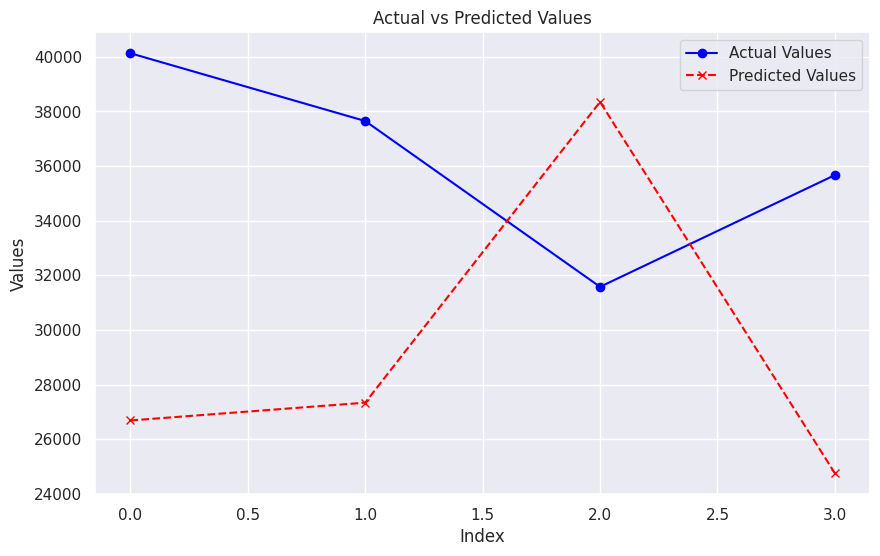

In [641]:
import matplotlib.pyplot as plt

# Create a DataFrame to display actual values, predicted values, and differences
results_df = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred_test, 'Difference (Actual - Predicted)': y_test - y_pred_test})

# Plot the actual values and predicted values
plt.figure(figsize=(10, 6))

# Line plot of actual values
plt.plot(y_test, color='blue', marker='o', linestyle='-', label='Actual Values')

# Line plot of predicted values
plt.plot(y_pred_test, color='red', marker='x', linestyle='--', label='Predicted Values')

# Adding titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
